In [30]:
import numpy as np
import pandas as pd
import sklearn.linear_model as linear_model
import seaborn as sns
import xgboost as xgb
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.model_selection import KFold
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from IPython.display import HTML,display
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score
%pylab inline
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


/home/ashwin/anaconda2/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['f', 'test']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [31]:
train=pd.read_csv('/home/ashwin/Downloads/bosten/train.csv')
test=pd.read_csv('/home/ashwin/Downloads/bosten/test.csv')

In [32]:
combain=pd.concat([train,test],axis=0)

In [33]:
nullValues=pd.DataFrame()
nullValues['nullValues']=train.isnull().sum()
nullValues['percentage']=0
nullValues['percentage']=nullValues.nullValues/nullValues.nullValues\
    .count()
nullValues[(nullValues.nullValues>0) & (nullValues.percentage>0.15)]\
    .sort_values(by='percentage',ascending=False).index.tolist()

['PoolQC',
 'MiscFeature',
 'Alley',
 'Fence',
 'FireplaceQu',
 'LotFrontage',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'BsmtExposure',
 'BsmtFinType2',
 'BsmtQual',
 'BsmtCond',
 'BsmtFinType1']

In [34]:
#combain=[train,test]
#for dataset in combain:
#    dataset=dataset.drop(['PoolQC',
# 'MiscFeature',
# 'Alley',
# 'Fence',
# 'FireplaceQu',
# 'LotFrontage',
# 'GarageType',
# 'GarageYrBlt',
# 'GarageFinish',
# 'GarageQual',
# 'GarageCond',
# 'BsmtExposure',
# 'BsmtFinType2',
# 'BsmtQual',
# 'BsmtCond',
# 'BsmtFinType1','Id'], axis=1, inplace=True)

In [35]:
combain.describe()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,OverallQual,PoolArea,SalePrice,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
count,2919.000000,2919.000000,2919.000000,2919.000000,2918.000000,2918.000000,2917.000000,2917.000000,2918.000000,2919.000000,...,2919.000000,2919.000000,1460.000000,2919.000000,2919.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,1159.581706,336.483727,2.602261,2.860226,441.423235,49.582248,0.429894,0.061364,560.772104,23.098321,...,6.089072,2.251799,180921.195890,16.062350,6.451524,1051.777587,93.709832,1971.312778,1984.264474,2007.792737
std,392.362079,428.701456,25.188169,0.822693,455.610826,169.205611,0.524736,0.245687,439.543659,64.244246,...,1.409947,35.663946,79442.502883,56.184365,1.569379,440.766258,126.526589,30.291442,20.894344,1.314964
min,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,34900.000000,0.000000,2.000000,0.000000,0.000000,1872.000000,1950.000000,2006.000000
25%,876.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,220.000000,0.000000,...,5.000000,0.000000,129975.000000,0.000000,5.000000,793.000000,0.000000,1953.500000,1965.000000,2007.000000
50%,1082.000000,0.000000,0.000000,3.000000,368.500000,0.000000,0.000000,0.000000,467.000000,0.000000,...,6.000000,0.000000,163000.000000,0.000000,6.000000,989.500000,0.000000,1973.000000,1993.000000,2008.000000
75%,1387.500000,704.000000,0.000000,3.000000,733.000000,0.000000,1.000000,0.000000,805.500000,0.000000,...,7.000000,0.000000,214000.000000,0.000000,7.000000,1302.000000,168.000000,2001.000000,2004.000000,2009.000000
max,5095.000000,2065.000000,508.000000,8.000000,5644.000000,1526.000000,3.000000,2.000000,2336.000000,1012.000000,...,10.000000,800.000000,755000.000000,576.000000,15.000000,6110.000000,1424.000000,2010.000000,2010.000000,2010.000000


In [36]:
nullValues[(nullValues.nullValues>0) & (nullValues.percentage<0.15)]\
    .sort_values(by='percentage',ascending=False)

,nullValues,percentage
MasVnrType,8,0.098765
MasVnrArea,8,0.098765
Electrical,1,0.012346


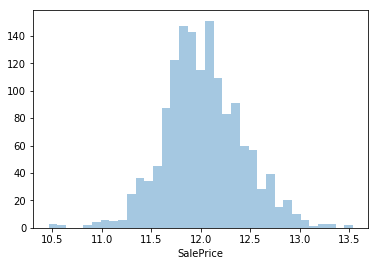

In [38]:
#sns.distplot(train['SalePrice'],kde=False,fit=stats.lognorm)
data=np.log1p(train['SalePrice'])
sns.distplot(data,kde=False)

In [39]:
print stats.skew(data)
print stats.kurtosis(data)

print stats.skew(train['SalePrice'])
print stats.kurtosis(train['SalePrice'])

0.121221913115
0.802642710747
1.88094074603
6.50981201109


In [40]:
#print train.shape
#print test.shape
#y_train=np.log1p(train['SalePrice'])
#train=train.drop('SalePrice',axis=1)
#print '---------------------------'
#print train.shape
#print test.shape

In [41]:
numerical_var=[f for f in train.columns if train.dtypes[f] 
        != 'object']
catagorical_var=[f for f in train.columns if train.dtypes[f] == 'object']

In [42]:
#train=train.fillna(train.mean())
#test=test.dropna()

In [43]:
#combain=pd.concat([train,test],axis=0)
#dummified_data=pd.get_dummies(combain[catagorical_var])
#combain=combain.drop(catagorical_var,axis=1)
#combain=pd.concat([combain,dummified_data],axis=1)
print combain.shape
print train.shape
print test.shape

(2919, 81)
(1460, 81)
(1459, 80)


In [44]:
skewed=train[numerical_var].apply(lambda x:stats.skew(x.dropna()))
skewed=skewed[skewed>0.75]
skewed=skewed.index
print np.size(list(skewed))
combain[skewed]=np.log1p(combain[skewed])

22


In [45]:
combain=pd.get_dummies(combain)
combain.shape

(2919, 290)

In [64]:
combain=combain.fillna(combain.mean())
combain=combain.drop('Id',axis=1)

In [65]:
X_train = combain[:train.shape[0]]
X_test = combain[train.shape[0]:]
y = train.SalePrice

In [66]:
def rmse_cv(model):
    rmse=np.sqrt(-(cross_val_score(model,X_train,y,scoring="neg_mean_squared_error",cv=5)))
    return rmse

In [67]:
model_ridge=Ridge()

In [68]:
alphas=[0.001,0.05,0.01,0.1,0.5,1,5,10,20,25,30,35,40,45,50,55,60,65,70,75]
ridge_cv_values=[rmse_cv(Ridge(alpha=alp)).mean() for alp in alphas]

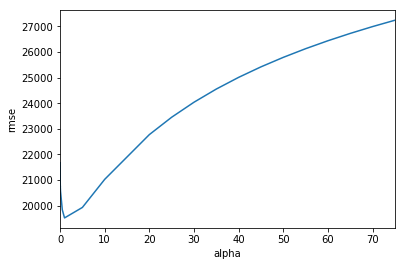

In [69]:
ridge_cv_values=pd.Series(ridge_cv_values,index=alphas)
ridge_cv_values.plot()
plt.xlabel("alpha")
plt.ylabel("rmse")

In [71]:
ridge_cv_values.min()

19525.195111557874

In [72]:
model_lasso=LassoCV(alphas = [1, 0.1, 0.001, 0.0005]).fit(X_train, y)
rmse_cv(model_lasso).mean()

/home/ashwin/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


20828.34753471295

In [76]:
coef=pd.Series(model_lasso.coef_,index=X_train.columns)
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 261 variables and eliminated the other 28 variables


In [81]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n